In [3]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          5.2                         
year           2018                        
month          12                          
day            20                          
svn rev        75870                       
language       R                           
version.string R version 3.5.2 (2018-12-20)
nickname       Eggshell Igloo              

In [2]:
if(!require(forecast)){install.packages("forecast")}
library(forecast)

Loading required package: forecast
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'forecast'"also installing the dependencies 'TTR', 'quantmod', 'fracdiff', 'tseries', 'urca', 'RcppArmadillo'




  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast    8.5    8.6              TRUE

  Binaries will be installed
package 'TTR' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpmeA3Zg\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.5.3"

In [4]:
nybirths <- scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")
nybirths

[1] 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
 [11] 21.672 21.870 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824
 [21] 23.105 23.110 21.759 22.073 21.937 20.035 23.590 21.672 22.222 22.123
 [31] 23.950 23.504 22.238 23.142 21.059 21.573 21.548 20.000 22.424 20.615
 [41] 21.761 22.874 24.104 23.748 23.262 22.907 21.519 22.025 22.604 20.894
 [51] 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252 22.084 22.991
 [61] 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
 [71] 22.964 23.981 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816
 [81] 25.210 25.199 23.162 24.707 24.364 22.644 25.565 24.062 25.431 24.635
 [91] 27.009 26.606 26.268 26.462 25.246 25.180 24.657 23.304 26.982 26.199
[101] 27.210 26.122 26.706 26.878 26.152 26.379 24.712 25.688 24.990 24.239
[111] 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784 25.693 26.881
[121] 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
[131] 26.291 26.987 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141
[141] 29.048 28.484 26.634 27.735 27.132 24.924 28.963 26.589 27.931 28.009
[151] 29.229 28.759 28.405 27.945 25.912 26.619 26.076 25.286 27.660 25.951
[161] 26.398 25.565 28.865 30.000 29.261 29.012 26.992 27.897

In [5]:
nybirthsByMonths <- ts(nybirths, frequency = 12, start = c(1946, 1))
nybirthsByMonths

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : 正式参数"cols"有多个与之相对应的实际参数

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,26.663,23.598,26.931,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870
1947,21.439,21.089,23.709,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073
1948,21.937,20.035,23.590,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573
1949,21.548,20.000,22.424,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025
1950,22.604,20.894,24.677,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991
1951,23.287,23.049,25.076,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981
1952,23.798,22.270,24.775,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707
1953,24.364,22.644,25.565,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180
1954,24.657,23.304,26.982,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688
1955,24.990,24.239,26.721,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881


In [6]:
nybirthsByMonthsDecompose <- decompose(nybirthsByMonths)

nybirthsByMonthsDecompose$trend
nybirthsByMonthsDecompose$seasonal
nybirthsByMonthsDecompose$random

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : 正式参数"cols"有多个与之相对应的实际参数

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,NA,NA,NA,NA,NA,NA,23.98433,23.66213,23.42333,23.16112,22.86425,22.54521
1947,22.35350,22.30871,22.30258,22.29479,22.29354,22.30562,22.33483,22.31167,22.26279,22.25796,22.27767,22.35400
1948,22.43038,22.43667,22.38721,22.35242,22.32458,22.27458,22.23754,22.21988,22.16983,22.07721,22.01396,22.02604
1949,22.06375,22.08033,22.13317,22.16604,22.17542,22.21342,22.27625,22.35750,22.48862,22.70992,22.98563,23.16346
1950,23.21663,23.26967,23.33492,23.42679,23.50638,23.57017,23.63888,23.75713,23.86354,23.89533,23.87342,23.88150
1951,24.00083,24.12350,24.20917,24.28208,24.35450,24.43242,24.49496,24.48379,24.43879,24.36829,24.29192,24.27642
1952,24.27204,24.27300,24.28942,24.30129,24.31325,24.35175,24.40558,24.44475,24.49325,24.58517,24.70429,24.76017
1953,24.78646,24.84992,24.92692,25.02362,25.16308,25.26963,25.30154,25.34125,25.42779,25.57588,25.73904,25.87513
1954,25.92446,25.92317,25.92967,25.92137,25.89567,25.89458,25.92963,25.98246,26.01054,25.88617,25.67087,25.57312
1955,25.64612,25.78679,25.93192,26.06388,26.16329,26.25388,26.35471,26.40496,26.45379,26.64933,26.95183,27.14683


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : 正式参数"cols"有多个与之相对应的实际参数

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1947,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1948,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1949,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1950,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1951,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1952,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1953,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1954,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197
1955,-0.6771947,-2.0829607,0.8625232,-0.8016787,0.2516514,-0.1532556,1.4560457,1.1645938,0.6916162,0.7752444,-1.1097652,-0.3768197


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : 正式参数"cols"有多个与之相对应的实际参数

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,NA,NA,NA,NA,NA,NA,-0.963379006,-0.925718750,-0.939949519,-0.709369391,-0.082484776,-0.298388622
1947,-0.237305288,0.863252404,0.543893429,0.175887019,-0.793193109,-1.391369391,-0.311879006,0.347739583,0.150592147,0.076797276,0.591098558,0.095819712
1948,0.183819712,-0.318705929,0.340268429,0.121262019,-0.354234776,0.001672276,0.256412660,0.119531250,-0.623449519,0.289547276,0.154806891,-0.076221955
1949,0.161444712,0.002627404,-0.571689904,-0.749362981,-0.666068109,0.813838942,0.371704327,0.225906250,0.081758814,-0.578161058,-0.356859776,-0.761638622
1950,0.064569712,-0.292705929,0.479560096,1.047887019,1.561973558,0.166088942,-0.423920673,-0.467718750,-0.433157853,-0.418577724,-0.679651442,-0.513680288
1951,-0.036638622,1.008460737,0.004310096,0.556595353,-0.176151442,0.387838942,0.499995994,-0.030385417,-0.116407853,-0.033536058,-0.218151442,0.081403045
1952,0.203153045,0.079960737,-0.376939904,-0.853612981,-0.576901442,0.538505609,0.414370994,0.206656250,0.025133814,-0.161411058,-0.432526442,0.323653045
1953,0.254736378,-0.122955929,-0.224439904,-0.159946314,0.016265224,-0.481369391,0.251412660,0.100156250,0.148592147,0.110880609,0.616723558,-0.318305288
1954,-0.590263622,-0.536205929,0.189810096,1.079303686,1.062681891,0.380672276,-0.679670673,-0.269052083,-0.550157853,-0.282411058,0.150890224,0.491694712
1955,0.021069712,0.535169071,-0.073439904,-1.787196314,-1.647943109,0.118380609,0.550245994,1.029447917,0.768592147,0.359422276,-0.149068109,0.110986378


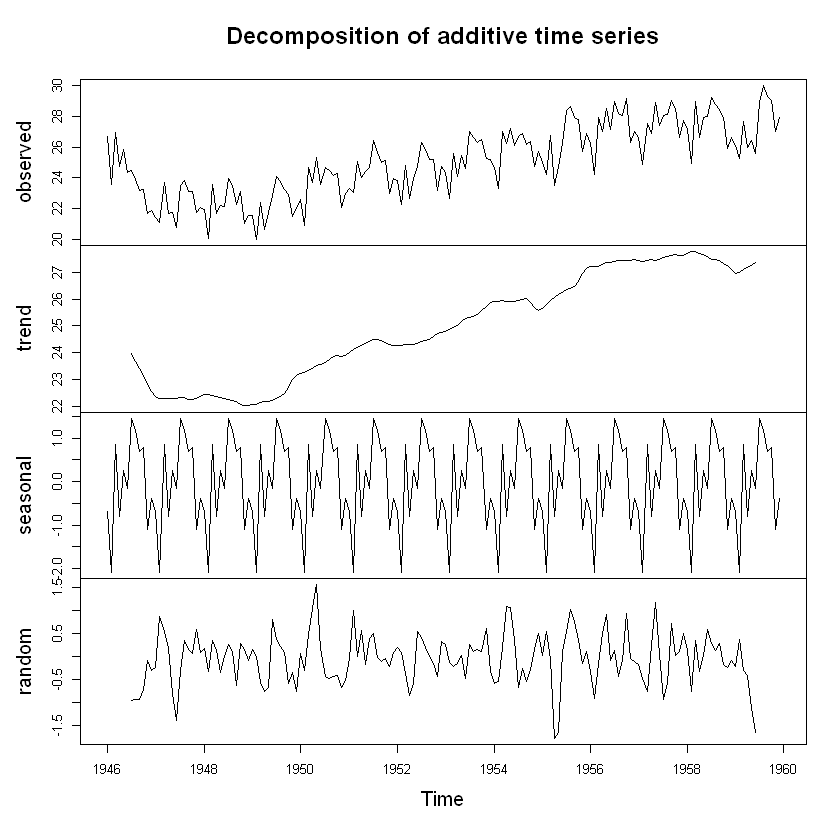

In [7]:
plot(nybirthsByMonthsDecompose)

In [8]:
nybirthsByMonthsDecomposeAdjusted <- ( nybirthsByMonths- nybirthsByMonthsDecompose$seasonal )

nybirthsByMonthsDecomposeAdjusted

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : 正式参数"cols"有多个与之相对应的实际参数

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,27.34019,25.68096,26.06848,25.54168,25.55435,24.51726,23.02095,22.73641,22.48338,22.45176,22.78177,22.24682
1947,22.11619,23.17196,22.84648,22.47068,21.50035,20.91426,22.02295,22.65941,22.41338,22.33476,22.86877,22.44982
1948,22.61419,22.11796,22.72748,22.47368,21.97035,22.27626,22.49395,22.33941,21.54638,22.36676,22.16877,21.94982
1949,22.22519,22.08296,21.56148,21.41668,21.50935,23.02726,22.64795,22.58341,22.57038,22.13176,22.62877,22.40182
1950,23.28119,22.97696,23.81448,24.47468,25.06835,23.73626,23.21495,23.28941,23.43038,23.47676,23.19377,23.36782
1951,23.96419,25.13196,24.21348,24.83868,24.17835,24.82026,24.99495,24.45341,24.32238,24.33476,24.07377,24.35782
1952,24.47519,24.35296,23.91248,23.44768,23.73635,24.89026,24.81995,24.65141,24.51838,24.42376,24.27177,25.08382
1953,25.04119,24.72696,24.70248,24.86368,25.17935,24.78826,25.55295,25.44141,25.57638,25.68676,26.35577,25.55682
1954,25.33419,25.38696,26.11948,27.00068,26.95835,26.27526,25.24995,25.71341,25.46038,25.60376,25.82177,26.06482
1955,25.66719,26.32196,25.85848,24.27668,24.51535,26.37226,26.90495,27.43441,27.22238,27.00876,26.80277,27.25782


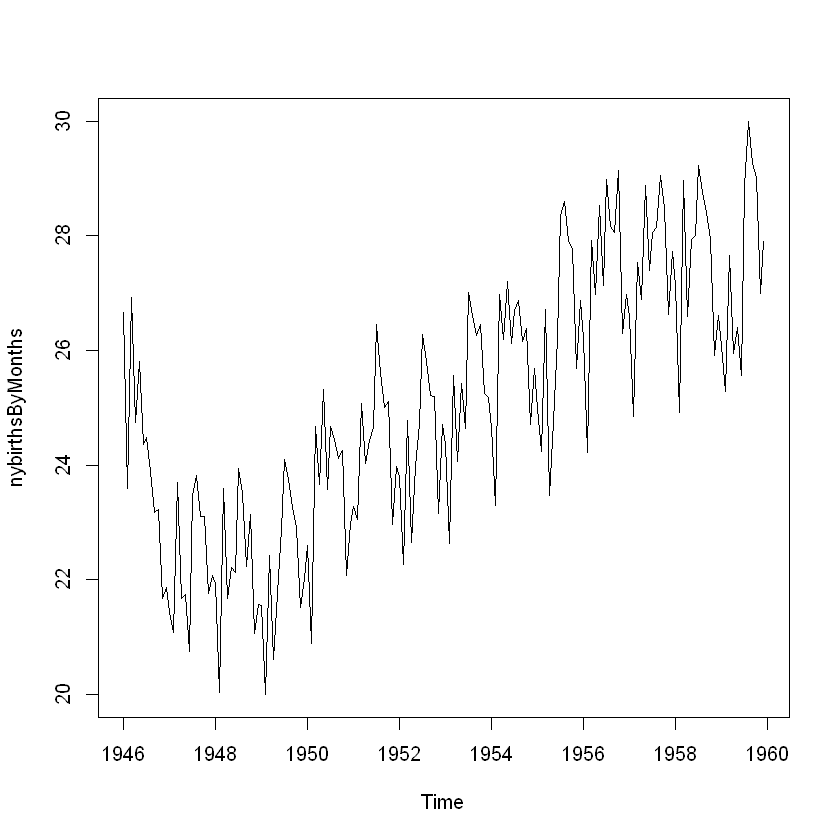

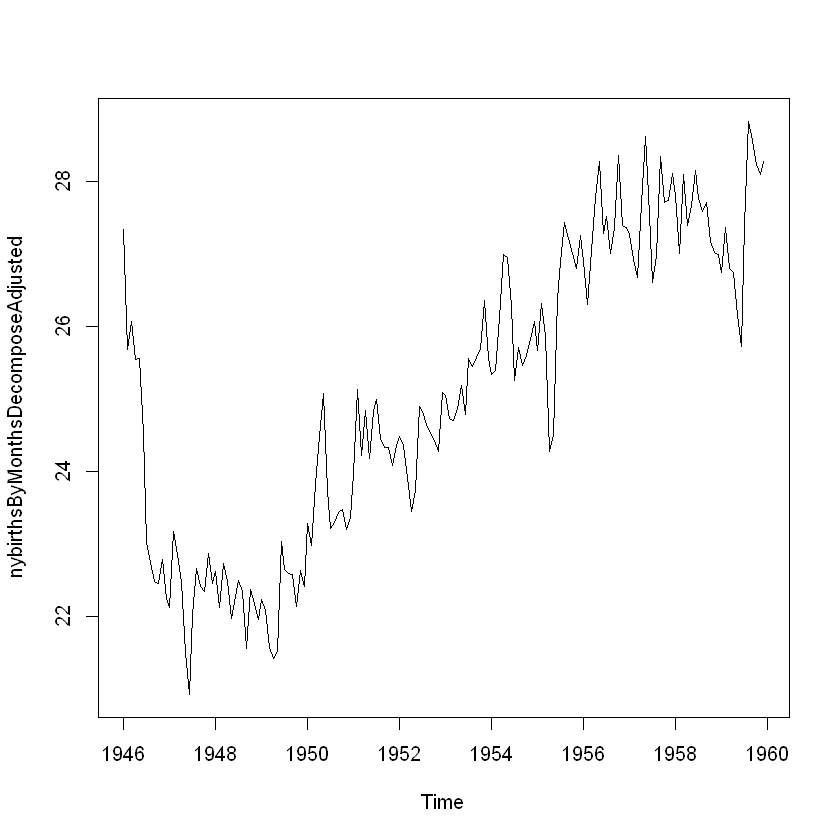

In [9]:
plot(nybirthsByMonths)
plot(nybirthsByMonthsDecomposeAdjusted)

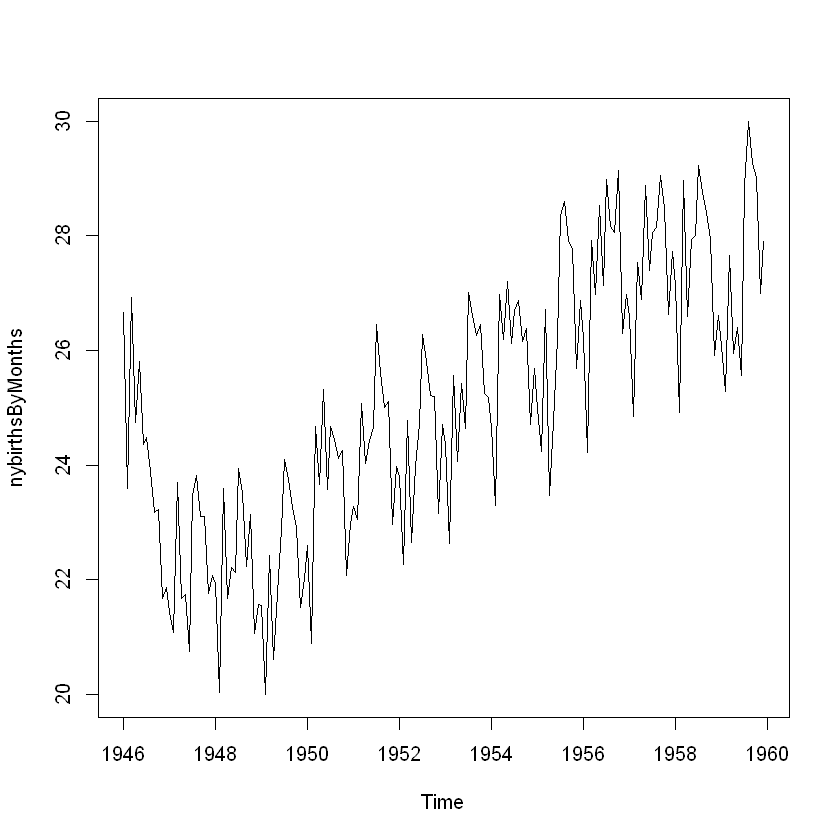

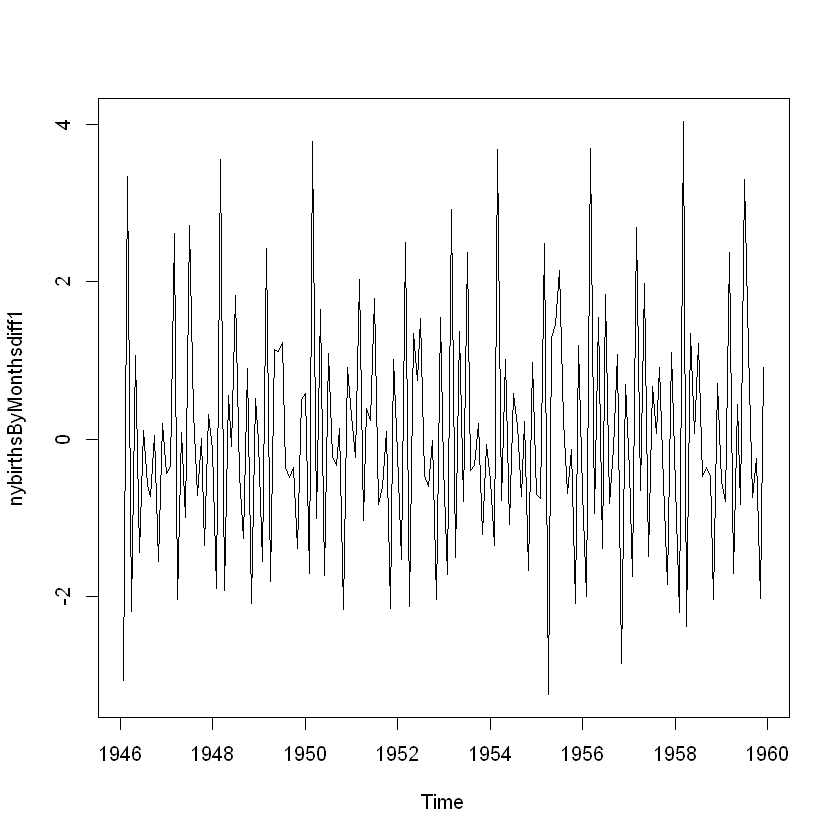

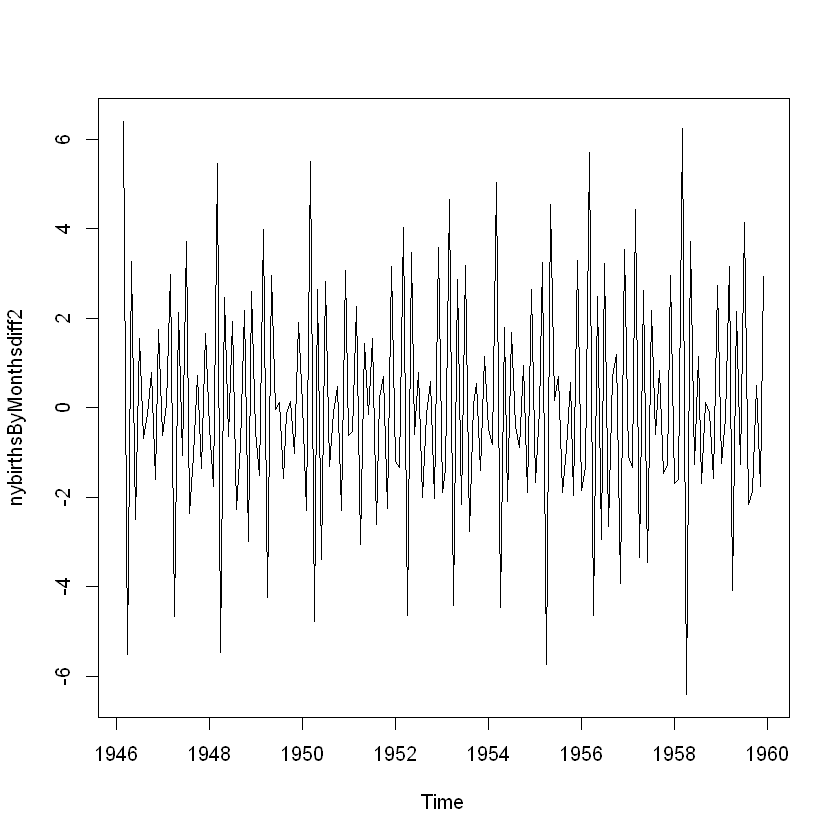

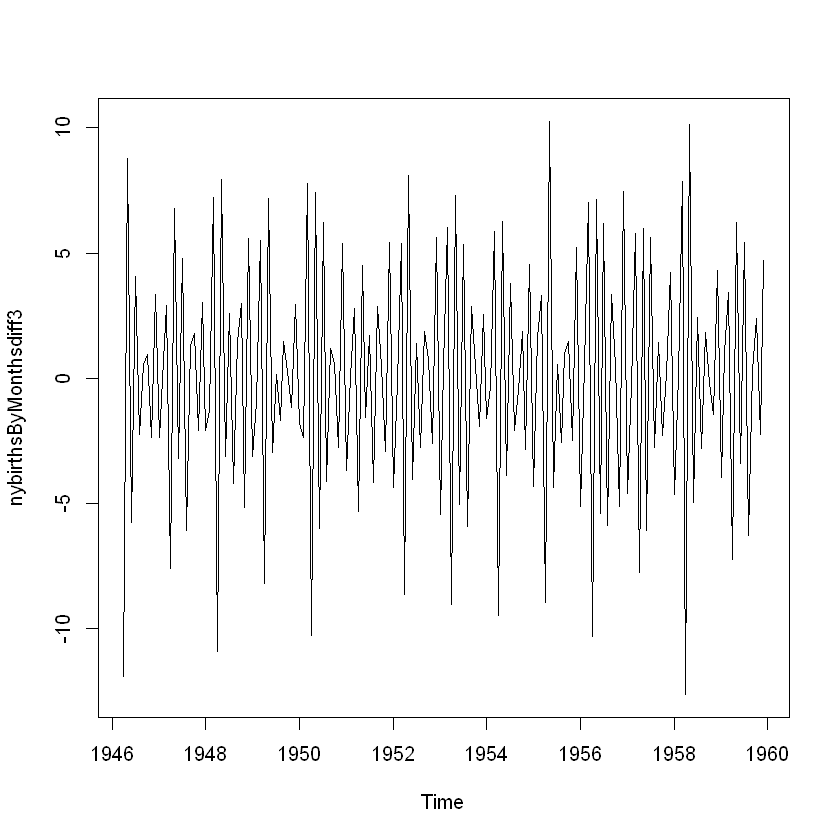

In [10]:
plot(nybirthsByMonths)

nybirthsByMonthsdiff1 <- diff(nybirthsByMonths, differences = 1)

plot(nybirthsByMonthsdiff1)


nybirthsByMonthsdiff2 <- diff(nybirthsByMonths, differences = 2)

plot(nybirthsByMonthsdiff2)


nybirthsByMonthsdiff3 <- diff(nybirthsByMonths, differences = 3)

plot(nybirthsByMonthsdiff3)

In [11]:
nybirthsByMonthsDecomposeAdjustedArima111 <- arima(nybirthsByMonthsDecomposeAdjusted, order = c(1,1,1))
nybirthsByMonthsDecomposeAdjustedArima111


Call:
arima(x = nybirthsByMonthsDecomposeAdjusted, order = c(1, 1, 1))

Coefficients:
          ar1     ma1
      -0.9288  1.0000
s.e.   0.0314  0.0194

sigma^2 estimated as 0.3681:  log likelihood = -154.49,  aic = 314.98

In [12]:
AutoArima <- auto.arima(nybirthsByMonthsDecomposeAdjusted)
AutoArima

Series: nybirthsByMonthsDecomposeAdjusted 
ARIMA(2,1,1)(1,0,2)[12] with drift 

Coefficients:
         ar1      ar2      ma1     sar1     sma1     sma2   drift
      0.3894  -0.2033  -0.4471  -0.1050  -0.2195  -0.1200  0.0192
s.e.  0.2227   0.0843   0.2248   0.6952   0.6989   0.2087  0.0195

sigma^2 estimated as 0.336:  log likelihood=-143.28
AIC=302.56   AICc=303.47   BIC=327.5

In [13]:
nybirthsByMonthsDecomposeAdjustedArima111Forcast <- forecast.Arima(nybirthsByMonthsDecomposeAdjustedArima111, h=12)
nybirthsByMonthsDecomposeAdjustedArima111Forcast
plot(nybirthsByMonthsDecomposeAdjustedArima111Forcast)

ERROR: Error in forecast.Arima(nybirthsByMonthsDecomposeAdjustedArima111, h = 12): 没有"forecast.Arima"这个函数


In [14]:
nybirthsByMonthsDecomposeAdjustedArimaAutoForcast <- forecast.Arima(AutoArima, h=12)
nybirthsByMonthsDecomposeAdjustedArimaAutoForcast
plot(nybirthsByMonthsDecomposeAdjustedArimaAutoForcast)

ERROR: Error in forecast.Arima(AutoArima, h = 12): 没有"forecast.Arima"这个函数
